# Loan Approval Prediction

##  Data collection:
      This is the classification project no.17(Loan approval prediction).the dataset for this project is downloaded from kaggle and represents relevant information for this project.

### Features:
*  loan_id: Unique identifier for each loan application.
* no_of_dependents: Number of dependents the applicant has.
*  education: Educational background of the applicant (Graduate or Not     Graduate).
* self_employed: Whether the applicant is self-employed (Yes/No).
* income_annum: Annual income of the applicant.
* loan_amount: Loan amount requested by the applicant.
* loan_term: Duration of the loan in months.
* cibil_score: Credit score of the applicant.
* residential_assets_value: Value of residential assets owned by the applicant.
* commercial_assets_value: Value of commercial assets owned by the applicant.
* luxury_assets_value: Value of luxury assets owned by the applicant.
* bank_asset_value: Total value of the applicant's assets in banks.
* loan_status: Final decision on the loan application (Approved/Rejected).<br>
<p>This dataset contains information on loan applications, including applicant demographics, financial details, creditworthiness, and asset values. It helps in analyzing factors that influence loan approval decisions by banks or financial institutions. Each entry represents a loan application, with features such as income, credit score, loan amount, and asset values, along with a final loan status (Approved/Rejected).</p>

In [332]:
# importing the necesary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
# loading the dataset
df= pd.read_csv("loan_approval_data.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    500 non-null    int64 
 1    no_of_dependents          500 non-null    int64 
 2    education                 500 non-null    object
 3    self_employed             500 non-null    object
 4    income_annum              500 non-null    int64 
 5    loan_amount               500 non-null    int64 
 6    loan_term                 500 non-null    int64 
 7    cibil_score               500 non-null    int64 
 8    residential_assets_value  500 non-null    int64 
 9    commercial_assets_value   500 non-null    int64 
 10   luxury_assets_value       500 non-null    int64 
 11   bank_asset_value          500 non-null    int64 
 12   loan_status               500 non-null    object
dtypes: int64(10), object(3)
memory usage: 50.9+ KB


## Data Cleaning

In [335]:
# checking the data types
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [336]:
# for columns names
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [337]:
# removing whitespaces present in the columns name
df.columns=df.columns.str.strip()

In [338]:
# setting index as loan_id
df.set_index('loan_id', inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [339]:
# checking for missing values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [340]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.600000,5.012400e+06,1.502940e+07,11.196000,598.508000,7.262400e+06,4.934200e+06,1.520880e+07,4.894000e+06
std,1.672601,2.970133e+06,9.576748e+06,5.545366,173.026617,6.682600e+06,4.491793e+06,9.765292e+06,3.311177e+06
min,0.000000,2.000000e+05,6.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.400000e+06,6.800000e+06,6.000000,452.000000,1.775000e+06,1.300000e+06,6.475000e+06,2.200000e+06
50%,3.000000,4.900000e+06,1.440000e+07,12.000000,609.000000,5.000000e+06,3.600000e+06,1.430000e+07,4.500000e+06
75%,4.000000,7.825000e+06,2.160000e+07,16.000000,735.250000,1.130000e+07,7.525000e+06,2.270000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.880000e+07,20.000000,900.000000,2.680000e+07,1.900000e+07,3.860000e+07,1.440000e+07


In [341]:
#for shape of dataset
df.shape

(500, 12)

Hence,we have 12 columns and 500 rows in our dataset and our target variables id loan_status.

In [342]:
# removing duplicates
print("Total duplicate rows:", df.duplicated().sum())



Total duplicate rows: 0


#Creating categorical and numerical columns in the dataset.

In [343]:
# listing out the categorial variables of object type only
categorical_columns=df.dtypes[df.dtypes == "object"].index
print("categorical_columns:",categorical_columns)
# listing out the numeric vaaribales of all the data type eexcluding object type
numeric_columns=df.select_dtypes(include=['number']).columns
print("numeric columns:",numeric_columns)

categorical_columns: Index(['education', 'self_employed', 'loan_status'], dtype='object')
numeric columns: Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


In [344]:
# checking the unique values in categorical columns 
for category in categorical_columns:
    print(f"number of unique value in {category}={len(df[category].unique())}")

number of unique value in education=2
number of unique value in self_employed=2
number of unique value in loan_status=2


In [345]:
# List of numerical columns to check for outliers
outlier_cols = [
    'income_annum', 'loan_amount', 
    'residential_assets_value', 'commercial_assets_value', 
    'luxury_assets_value', 'bank_asset_value'
]

# Detecting  Outliers Using IQR
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count how many outliers exist
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers detected.")


income_annum: 0 outliers detected.
loan_amount: 0 outliers detected.
residential_assets_value: 3 outliers detected.
commercial_assets_value: 6 outliers detected.
luxury_assets_value: 0 outliers detected.
bank_asset_value: 0 outliers detected.


In [346]:
# Remove Outliers Using IQR**
def remove_outliers_iqr(df, columns):
    initial_shape = df.shape  # Store initial number of rows
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    final_shape = df.shape  # Get the number of rows after removal
    print(f"Removed {initial_shape[0] - final_shape[0]} rows containing outliers.")
    return df

# Apply the function
df = remove_outliers_iqr(df, outlier_cols)

# Check new dataset shape
print(f"New dataset shape after outlier removal: {df.shape}")


Removed 10 rows containing outliers.
New dataset shape after outlier removal: (490, 12)


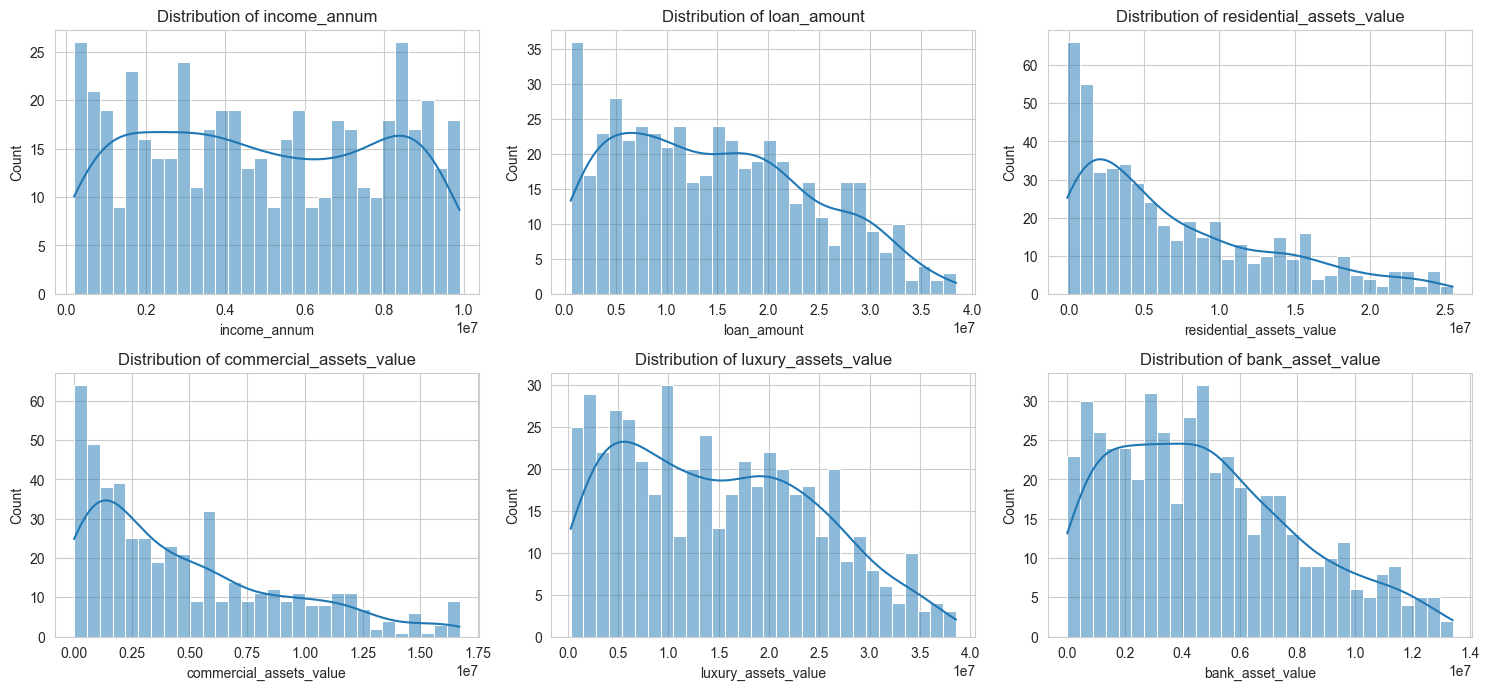

In [347]:


# List of numerical columns to check
num_cols = [
    'income_annum', 'loan_amount', 
    'residential_assets_value', 'commercial_assets_value', 
    'luxury_assets_value', 'bank_asset_value'
]

# Plot histograms & KDE plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [348]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '', regex=True)


## EDA

### 1.Feature Relationship Analysis 


#### Income vs. Loan Amount Analysis: <br>
* Compare approved and rejected loans based on income annum and loan amount. 


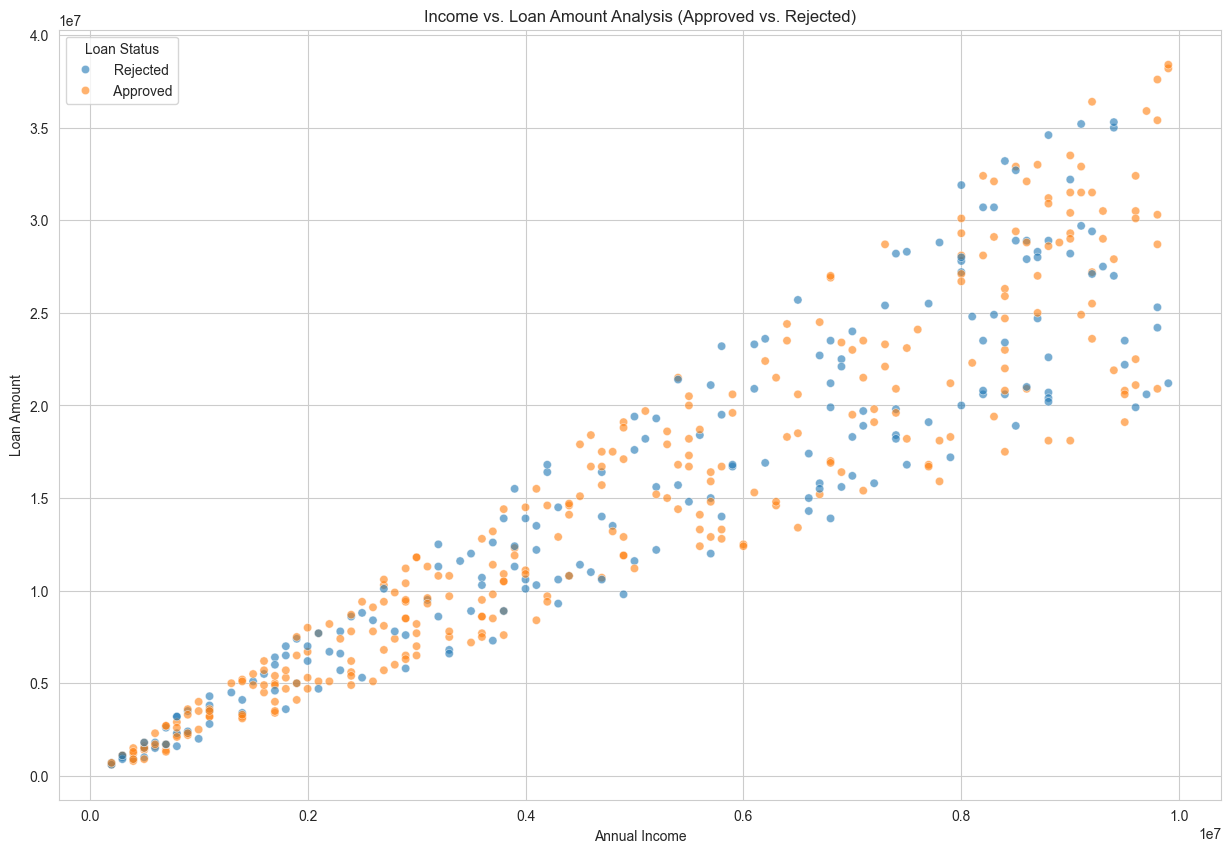

In [350]:

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="income_annum", y="loan_amount", hue="loan_status", alpha=0.6)
plt.title("Income vs. Loan Amount Analysis (Approved vs. Rejected)")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Status")
plt.show()


The blue and orange points form an upward trend that means higher income apllicants generally apply for larger loans.This mean they both are directly proportional to each other.Both points are spread across all income levels.
however,at lower income levels,there seem to be more rejection and at higher income levels the approval rate appears to increase.Hence,loan approval is not solely depend upon annual_income. 

 ### CIBIL Score Impact on Loan Approval: 
   * Analyze how cibil score affects loan status using distribution plots. 

C:\Users\user\AppData\Local\Temp\ipykernel_19148\3979351265.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Loan Status")


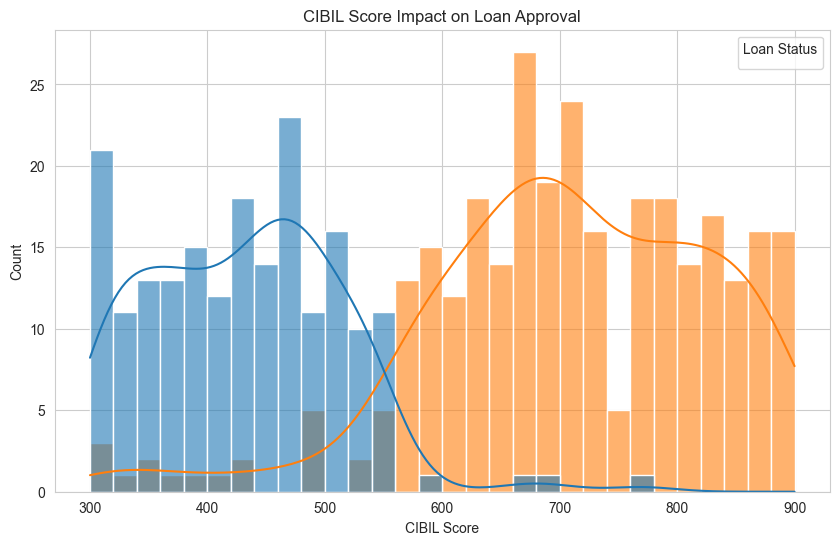

In [351]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="cibil_score", hue="loan_status", kde=True, bins=30, alpha=0.6)
plt.title("CIBIL Score Impact on Loan Approval")
plt.xlabel("CIBIL Score")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


Most rejected loan have cibil scores below 550 which means that applicants with low credit scores are more likely to face rejection.the peak approval rate is seen between 650-850,meaning banks favor applicants with higher creditworthiness.

### 2.Loan Risk & Applicant Profile Analysis 


#### Self-Employed vs. Salaried Loan Approval Rate: 
* Compare approval rates between self-employed and salaried applicants.

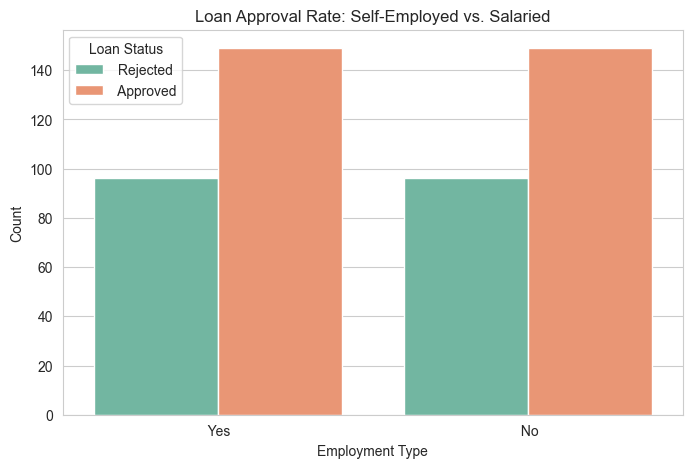

In [352]:

plt.figure(figsize=(8, 5))

# Count plot to show approval rates
sns.countplot(data=df, x="self_employed", hue="loan_status", palette="Set2")

plt.title("Loan Approval Rate: Self-Employed vs. Salaried")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


Both self employed and salaried applicants have nearly the same approval count.however,Self-employed individuals seem to have more rejections compared to salaried aplicants.<br>
For Loan Risk Analysis, self employed individuals might lack stable income proof,leading to higher rejection rates.


#### Loan Term vs. Approval Probability
 * Identify if longer loan terms correlate with higher rejection rates.

<Figure size 800x500 with 0 Axes>

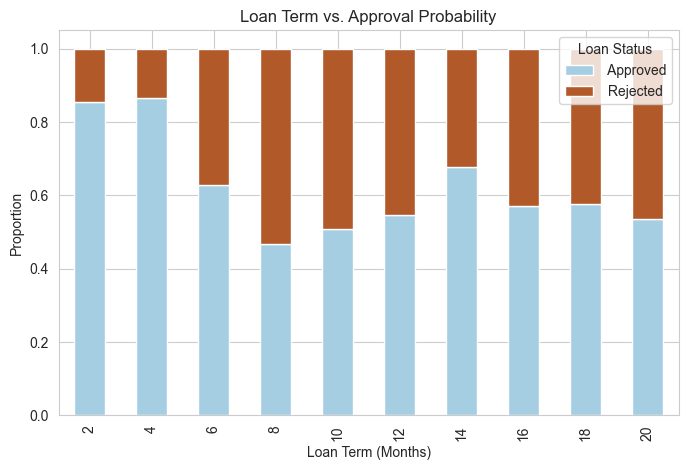

In [353]:
plt.figure(figsize=(8, 5))

# Approval percentage by Loan Term
approval_rate = df.groupby("loan_term")["loan_status"].value_counts(normalize=True).unstack()
approval_rate.plot(kind="bar", stacked=True, colormap="Paired", figsize=(8, 5))

plt.title("Loan Term vs. Approval Probability")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Proportion")
plt.legend(title="Loan Status")
plt.show()


The proportion of approved loan decreases as the loan term increases.For shorter loan terms,approvals are higher and for longer loan terms,rejection rates increases significantly.

### 3.Asset & Loan Amount Interactions 

#### Total Asset Value vs. Loan Amount: 
* Calculate total assets = residential + commercial + luxury + bank assets 

In [354]:
# calculating the total assests value
df["total_assets"]=(df["residential_assets_value"]+df["commercial_assets_value"]+df["luxury_assets_value"] +df["bank_asset_value"])
df["total_assets"]

loan_id
2      17000000
3      57700000
4      52700000
5      55000000
6      33900000
         ...   
496    10800000
497    74600000
498    45800000
499    39800000
500    81100000
Name: total_assets, Length: 490, dtype: int64

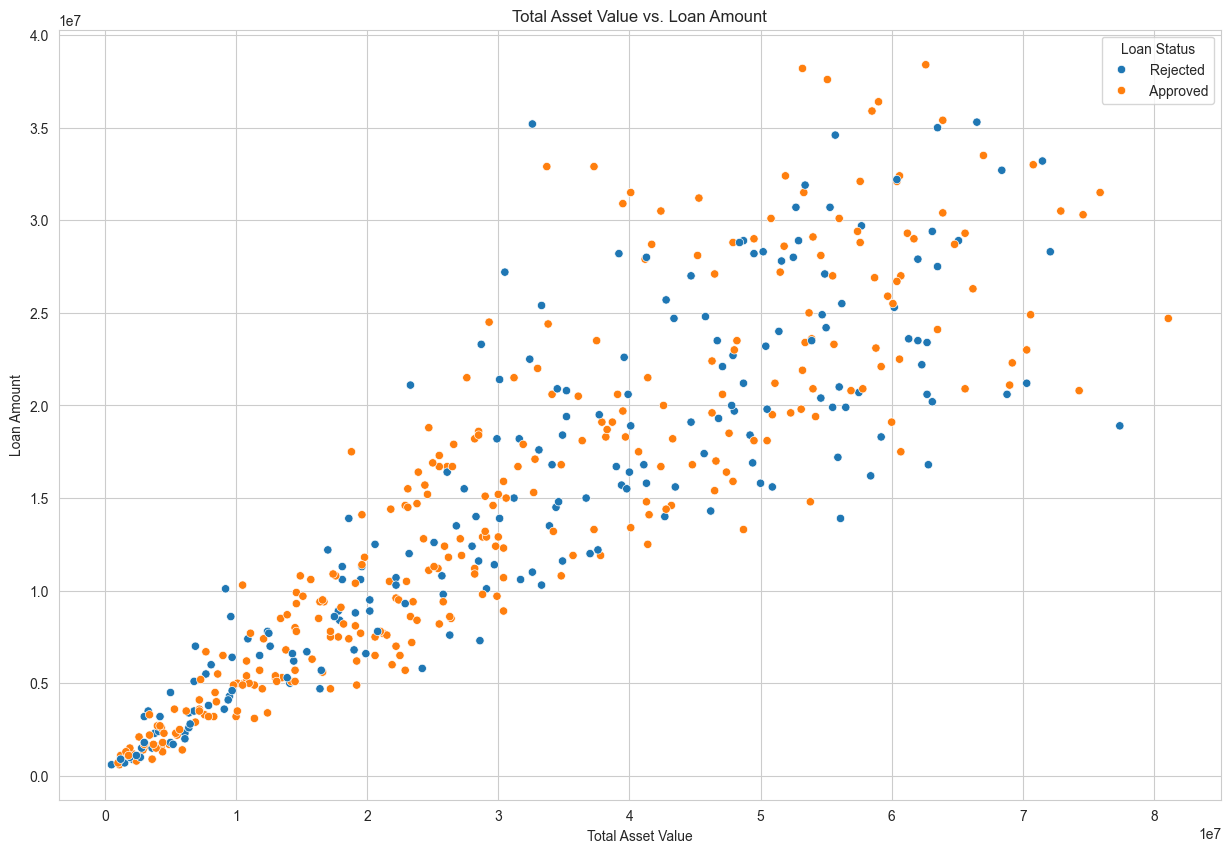

In [355]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df["total_assets"], y=df["loan_amount"], hue=df["loan_status"])
plt.xlabel("Total Asset Value")
plt.ylabel("Loan Amount")
plt.title("Total Asset Value vs. Loan Amount")
plt.legend(title="Loan Status")
plt.show()

 #### Commercial vs. Residential Asset Contribution: 
* Check which asset type impacts approval rates the most.

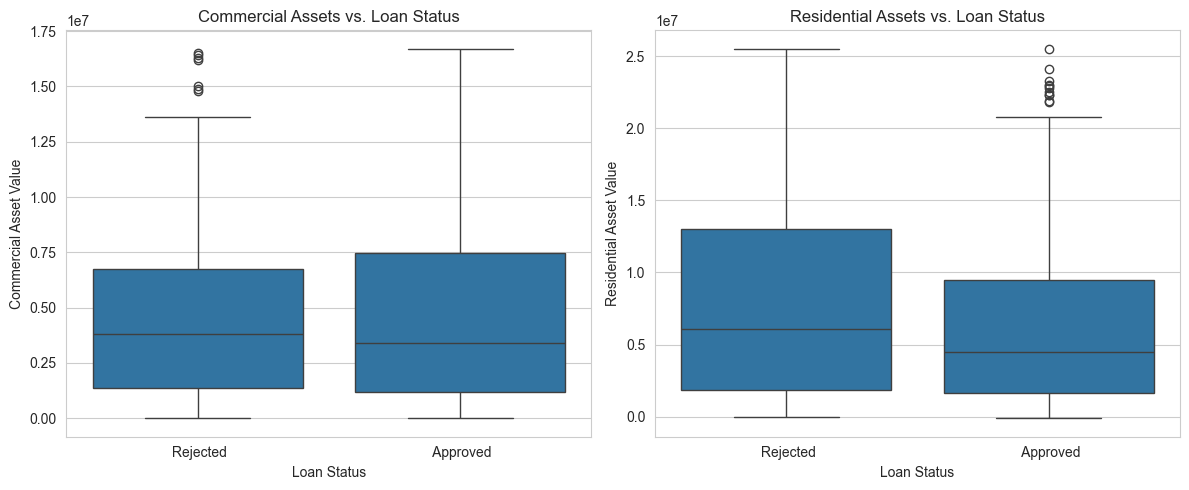

In [356]:
plt.figure(figsize=(12, 5))

# Boxplot for Commercial Assets
plt.subplot(1, 2, 1)
sns.boxplot(x=df["loan_status"], y=df["commercial_assets_value"])
plt.title("Commercial Assets vs. Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Commercial Asset Value")

# Boxplot for Residential Assets
plt.subplot(1, 2, 2)
sns.boxplot(x=df["loan_status"], y=df["residential_assets_value"])
plt.title("Residential Assets vs. Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Residential Asset Value")

plt.tight_layout()
plt.show()


#### Luxury Assets & Loan Approval: 
* Identify if applicants with luxury assets get approvals more easily. 

C:\Users\user\AppData\Local\Temp\ipykernel_19148\4285613722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="loan_status", y="luxury_assets_value", estimator=sum, palette="coolwarm")


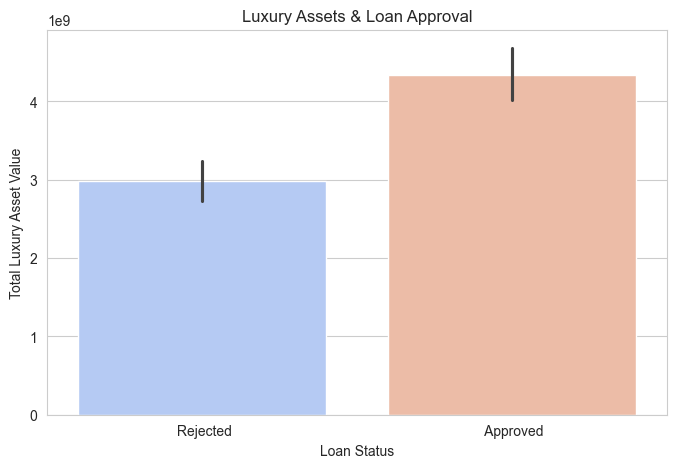

In [357]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="loan_status", y="luxury_assets_value", estimator=sum, palette="coolwarm")
plt.xlabel("Loan Status")
plt.ylabel("Total Luxury Asset Value")
plt.title("Luxury Assets & Loan Approval")
plt.show()

### 4. Loan Repayment & Default Risk Indicators 

#### CIBIL Score Distribution for Approved & Rejected Loans: 
*  Determine the CIBIL score threshold for approvals.

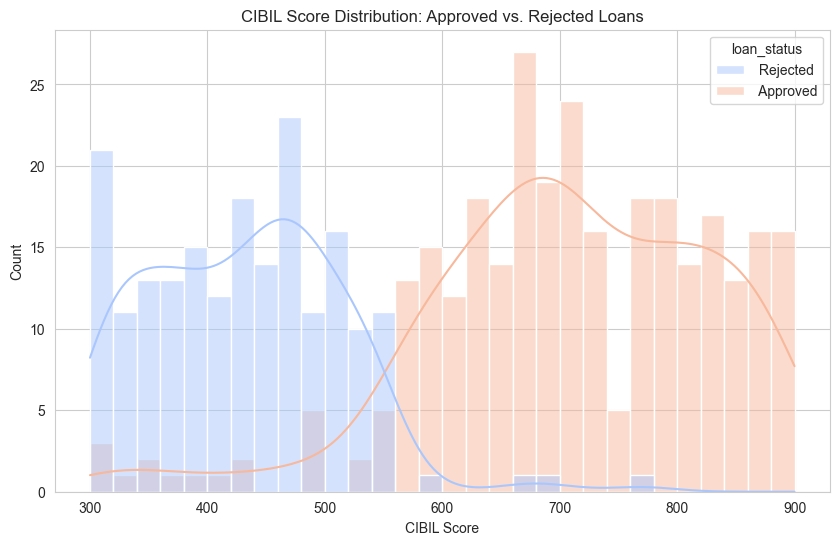

In [358]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="cibil_score", hue="loan_status", kde=True, bins=30, palette="coolwarm")
plt.xlabel("CIBIL Score")
plt.ylabel("Count")
plt.title("CIBIL Score Distribution: Approved vs. Rejected Loans")
plt.show()

There is no excat cibil score threshold ,based on this data a higher cibil score correlates with the higher chance of loan appproval.A cibil score around 700 or higher seem to be  a good target for approval.However,some loan were approved with scores lower than 700, and some were rejected with scores higher.

#### Loan Amount to Income Ratio Analysis: 
* Compute loan-to-income ratio and analyze its impact on approval chances.

C:\Users\user\AppData\Local\Temp\ipykernel_19148\2262948151.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="loan_status", y="loan_to_income_ratio", palette="Set2")


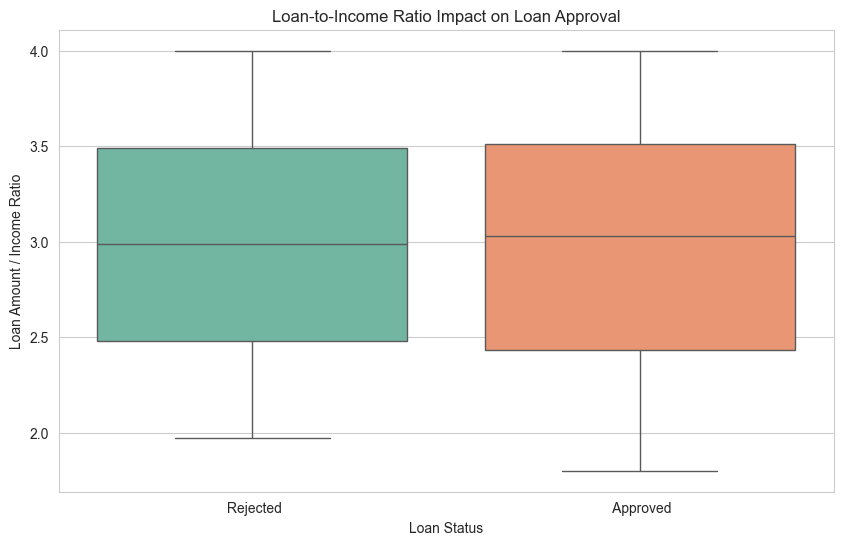

In [359]:
# calculating the loan amount to income ratio 
df["loan_to_income_ratio"] = df["loan_amount"] / df["income_annum"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="loan_status", y="loan_to_income_ratio", palette="Set2")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount / Income Ratio")
plt.title("Loan-to-Income Ratio Impact on Loan Approval")
plt.show()


The median loan to income ratio for approves loans appears slightly lower than that of rejected loans.A lower loan to income ratio seems to be slightly correlated with a higher likelihood of loan approval.Banks approved loan for the people who borrow a amount of money relative to their income

In [360]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,loan_to_income_ratio
loan_id,,,,,,,,,,,,,,
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,2.975610
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,3.263736
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,3.743902
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,2.469388
6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,33900000,2.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2,Not Graduate,Yes,2400000,5400000,12,739,300000,2500000,5000000,3000000,Approved,10800000,2.250000
497,5,Graduate,Yes,9800000,30300000,6,867,20800000,16000000,30200000,7600000,Approved,74600000,3.091837
498,2,Not Graduate,No,8100000,24800000,6,307,200000,4000000,31100000,10500000,Rejected,45800000,3.061728


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 2 to 500
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          490 non-null    int64  
 1   education                 490 non-null    object 
 2   self_employed             490 non-null    object 
 3   income_annum              490 non-null    int64  
 4   loan_amount               490 non-null    int64  
 5   loan_term                 490 non-null    int64  
 6   cibil_score               490 non-null    int64  
 7   residential_assets_value  490 non-null    int64  
 8   commercial_assets_value   490 non-null    int64  
 9   luxury_assets_value       490 non-null    int64  
 10  bank_asset_value          490 non-null    int64  
 11  loan_status               490 non-null    object 
 12  total_assets              490 non-null    int64  
 13  loan_to_income_ratio      490 non-null    float64
dtypes: float64(1), 

In [362]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,loan_to_income_ratio
loan_id,,,,,,,,,,,,,,
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,2.975610
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,3.263736
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,3.743902
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,2.469388
6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,33900000,2.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2,Not Graduate,Yes,2400000,5400000,12,739,300000,2500000,5000000,3000000,Approved,10800000,2.250000
497,5,Graduate,Yes,9800000,30300000,6,867,20800000,16000000,30200000,7600000,Approved,74600000,3.091837
498,2,Not Graduate,No,8100000,24800000,6,307,200000,4000000,31100000,10500000,Rejected,45800000,3.061728


#### Effect of Bank Asset Value on Approval: 
* Compare bank asset values between approved and rejected applications.

C:\Users\user\AppData\Local\Temp\ipykernel_19148\4160662601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="loan_status", y="bank_asset_value", palette="coolwarm")


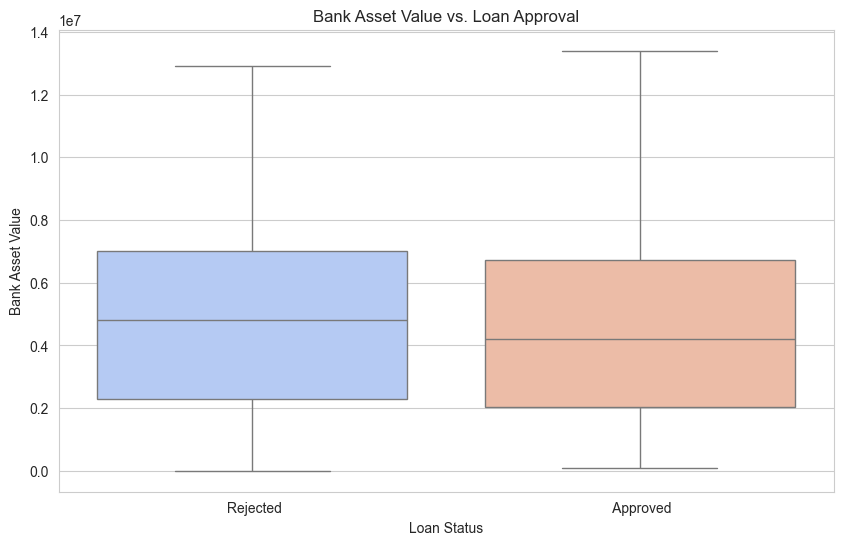

In [363]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="loan_status", y="bank_asset_value", palette="coolwarm")
plt.xlabel("Loan Status")
plt.ylabel("Bank Asset Value")
plt.title("Bank Asset Value vs. Loan Approval")
plt.show()


### 5. Feature Engineering & Transformation 

#### Create Risk Categories for CIBIL Score: 
* High Risk (CIBIL < 600), Medium Risk (600-750), Low Risk (750+).

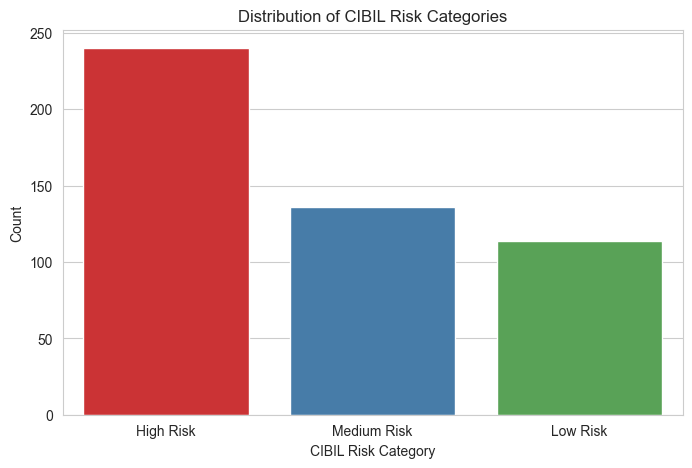

In [364]:
#creating risk category based on cibil score
def categorize_cibil(score):
    if score < 600:
        return "High Risk"
    elif 600 <= score <= 750:
        return "Medium Risk"
    else:
        return "Low Risk"

df["CIBIL_Risk"] = df["cibil_score"].apply(categorize_cibil)

plt.figure(figsize=(8, 5))
sns.countplot(x='CIBIL_Risk', data=df, hue='CIBIL_Risk', palette='Set1')
plt.title('Distribution of CIBIL Risk Categories')
plt.xlabel('CIBIL Risk Category')
plt.ylabel('Count')
plt.show()

 #### Binning Loan Amount & Income: 
* Convert loan amount and income annum into categorical bins (Low,Medium,High).

In [365]:
# Calculating minimun and maximum loan amount 
min_loan=df['loan_amount'].min()
max_loan=df['loan_amount'].max()
print(min_loan)
print(max_loan)

#calculating minimum and maximum income_annum
min_income=df['income_annum'].min()
max_income=df['income_annum'].max()
print("lowest income:",min_income)
print("Highet income:",max_income)

600000
38400000
lowest income: 200000
Highet income: 9900000


In [366]:

# Define bins ensuring they are unique
loan_bins = [0,600000,18900000,df["loan_amount"].max() + 1]  # Ensure max value is not repeated
loan_labels = ["Low", "Medium", "High"]
df["Loan_Amount_Category"] = pd.cut(df["loan_amount"], bins=loan_bins, labels=loan_labels)

# Define bins for income
income_bins = [0,200000,5000000,df["income_annum"].max() + 1]  # Ensuring uniqueness
income_labels = ["Low", "Medium", "High"]
df["Income_Category"] = pd.cut(df["income_annum"], bins=income_bins, labels=income_labels)



#### Calculate Debt-to-Asset Ratio: 
* (loan amount) / (total asset value).

In [368]:
df["Total_Assets"] = df["residential_assets_value"] + df["commercial_assets_value"] + df["luxury_assets_value"] + df["bank_asset_value"]
df["Debt_to_Asset_Ratio"] = df["loan_amount"] / df["Total_Assets"]


C:\Users\user\AppData\Local\Temp\ipykernel_19148\298377028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["loan_status"], y=df["Debt_to_Asset_Ratio"], palette="coolwarm")


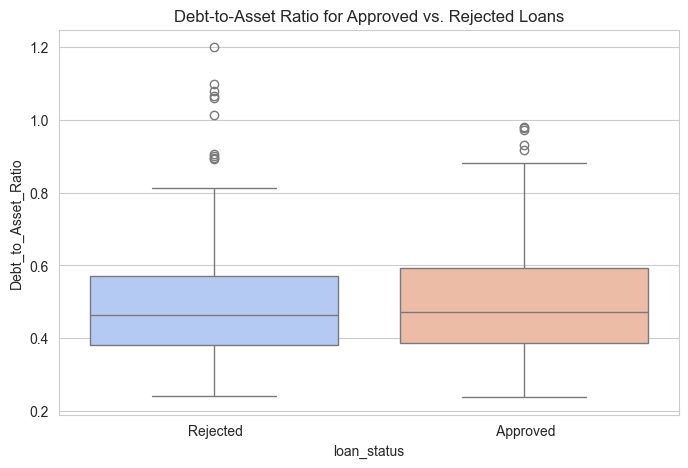

In [369]:
# comparing debt to aasset ratio for approved vs. rejected loans
plt.figure(figsize=(8,5))
sns.boxplot(x=df["loan_status"], y=df["Debt_to_Asset_Ratio"], palette="coolwarm")
plt.title("Debt-to-Asset Ratio for Approved vs. Rejected Loans")
plt.show()


These outliers in the rejected category indicate that having a very high Debt-to-Asset ratio significantly increases the likelihood of loan rejection.

In [370]:
# One hot Encoding
df_encoded=pd.get_dummies(df[['education','self_employed','loan_status','CIBIL_Risk','Loan_Amount_Category','Income_Category']])
df = pd.concat([df, df_encoded], axis=1)
df


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,...,loan_status_ Rejected,CIBIL_Risk_High Risk,CIBIL_Risk_Low Risk,CIBIL_Risk_Medium Risk,Loan_Amount_Category_Low,Loan_Amount_Category_Medium,Loan_Amount_Category_High,Income_Category_Low,Income_Category_Medium,Income_Category_High
loan_id,,,,,,,,,,,,,,,,,,,,,
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,...,True,True,False,False,False,True,False,False,True,False
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,...,True,True,False,False,False,False,True,False,False,True
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,...,True,True,False,False,False,False,True,False,False,True
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,...,True,True,False,False,False,False,True,False,False,True
6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,...,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2,Not Graduate,Yes,2400000,5400000,12,739,300000,2500000,5000000,...,False,False,False,True,False,True,False,False,True,False
497,5,Graduate,Yes,9800000,30300000,6,867,20800000,16000000,30200000,...,False,False,True,False,False,False,True,False,False,True
498,2,Not Graduate,No,8100000,24800000,6,307,200000,4000000,31100000,...,True,True,False,False,False,False,True,False,False,True


In [371]:
# dropping one hot encoded columns
df = df.drop(['education', 'self_employed','CIBIL_Risk','Income_Category','Loan_Amount_Category'], axis=1)

In [ ]:
# removing white spaces from the columns name 
df.columns = df.columns.str.replace(' ', '')

In [373]:
df.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'total_assets', 'loan_to_income_ratio', 'Total_Assets',
       'Debt_to_Asset_Ratio', 'education_Graduate', 'education_NotGraduate',
       'self_employed_No', 'self_employed_Yes', 'loan_status_Approved',
       'loan_status_Rejected', 'CIBIL_Risk_HighRisk', 'CIBIL_Risk_LowRisk',
       'CIBIL_Risk_MediumRisk', 'Loan_Amount_Category_Low',
       'Loan_Amount_Category_Medium', 'Loan_Amount_Category_High',
       'Income_Category_Low', 'Income_Category_Medium',
       'Income_Category_High'],
      dtype='object')

## Training and Testing 

In [ ]:
# Defining target variable (y)
y = df["loan_status"]  #loan_status as my target column  

# Defining feature variables (X) and removing the columns which are least important for futher training and testing
X = df.drop(columns=["loan_status","education_Graduate","education_NotGraduate","self_employed_Yes","self_employed_No","loan_status_Approved","loan_status_Rejected","luxury_assets_value","bank_asset_value"])  

# Checking if X and y are defined  
print(X.head())  
print(y.head()) 


         no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
loan_id                                                                        
2                       0       4100000     12200000          8          417   
3                       3       9100000     29700000         20          506   
4                       3       8200000     30700000          8          467   
5                       5       9800000     24200000         20          382   
6                       0       4800000     13500000         10          319   

         residential_assets_value  commercial_assets_value  total_assets  \
loan_id                                                                    
2                         2700000                  2200000      17000000   
3                         7100000                  4500000      57700000   
4                        18200000                  3300000      52700000   
5                        12400000                  8200000 

In [ ]:
from sklearn.model_selection import train_test_split
#splitiind data into testing and training

# Spliting 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirming the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (392, 20)
Testing data shape: (98, 20)


In [380]:
# Checking missing values
missing_values = X_train.isnull().sum().sum()
print("Missing values:", missing_values)

# Checking infinite values
infinite_values = np.isinf(X_train).sum().sum()
print("Infinite values:", infinite_values)


Missing values: 0
Infinite values: 0


In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [383]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)


In [390]:
# Evaluating model performance

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy, 2))


Logistic Regression Accuracy: 0.96


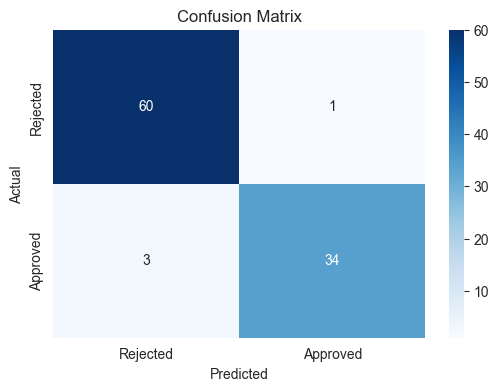

In [391]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Approved       0.95      0.98      0.97        61
    Rejected       0.97      0.92      0.94        37

    accuracy                           0.96        98
   macro avg       0.96      0.95      0.96        98
weighted avg       0.96      0.96      0.96        98

